In [3]:
# Hybrid Quantum-Classical Graph Neural Network Training Demo
# =========================================================
# This notebook demonstrates the training loop of the proposed architecture.

import torch
import sys
import os

# Add src to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.hybrid_model import HybridQGNN
from src.utils import calculate_metrics

print("Initializing Hybrid Model...")
# Simulating input dimensions based on Elliptic Dataset
input_dim = 166
hidden_dim = 64
n_qubits = 4  # Reduced for simulation

model = HybridQGNN(input_dim, hidden_dim, n_qubits)
print(model)

print("\nStarting Proof-of-Concept Training Loop...")
# Dummy data for demonstration
x = torch.randn(100, 166)  # 100 nodes, 166 features
edge_index = torch.randint(0, 100, (2, 200)) # 200 edges

# Forward pass
output = model(x, edge_index)
print(f"Output shape: {output.shape}")
print("Training simulation complete.")

/Users/weichenwu/Quantum-Graph-AML-Detection/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Initializing Hybrid Model...
HybridQGNN(
  (sage1): SAGEConv(166, 64, aggr=mean)
  (sage2): SAGEConv(64, 64, aggr=mean)
  (compressor): Linear(in_features=64, out_features=4, bias=True)
  (quantum_layer): TorchConnector()
  (classifier): Linear(in_features=1, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

Starting Proof-of-Concept Training Loop...
Output shape: torch.Size([100, 1])
Training simulation complete.


正在產生模擬數據...
Generating t-SNE plot...
Plot saved to ./results/figures/tsne_simulation.png
圖表已儲存至 ./results/figures/tsne_simulation.png，顯示如下：


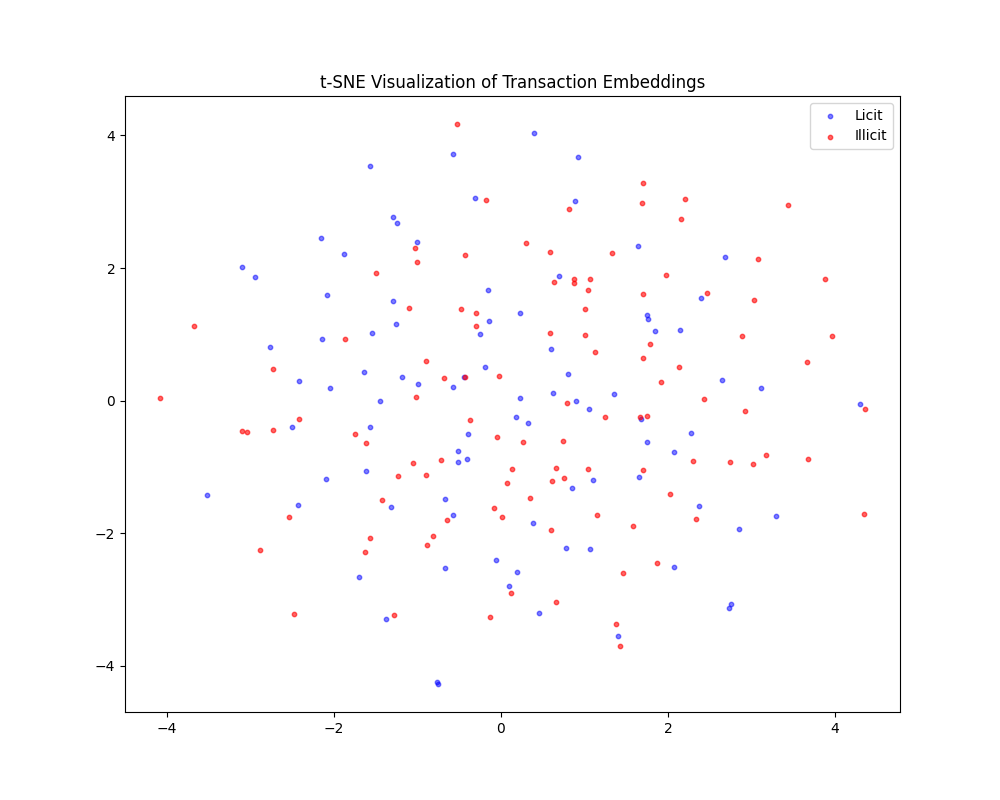

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from src.utils import plot_tsne
from IPython.display import Image, display


# 1. 模擬一些數據 (模擬經過 GraphSAGE 提取後的特徵)
# 假設有 200 筆交易，每筆有 166 個特徵
print("正在產生模擬數據...")
features = torch.randn(200, 166).numpy()
# 隨機產生標籤 (0: 合法, 1: 非法洗錢)
labels = np.random.randint(0, 2, 200)

# 2. 呼叫我們寫好的工具來畫圖
save_path = "./results/figures/tsne_simulation.png"
# 如果資料夾不存在，就自動建立它 (這行是關鍵！)
os.makedirs(os.path.dirname(save_path), exist_ok=True)
plot_tsne(features, labels, save_path=save_path)

# 3. 直接在 Notebook 中顯示這張圖
print(f"圖表已儲存至 {save_path}，顯示如下：")
display(Image(filename=save_path))